In [24]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
data_dir= Path('practical-statistics-for-data-scientists/data')

## Simple Linear Regression

$ Y = b_{0} + b_{1}X $

$b_{0}$ = intercept <br>
$b_{1}$ = slope

- **Response**<br>
The variable we are trying to predict.<br>
_Synonyms_: 
dependent variable, Y variable, target, outcome<br>

- **Independent variable**<br>
The variable used to predict the response.<br>
_Synonyms_: 
X variable, feature, attribute, predictor<br>
- **Record**<br>
The vector of predictor and outcome values for a specific individual or case.<br>
_Synonyms_: 
row, case, instance, example<br>
- **Intercept**<br>
The intercept of the regression line—that is, the predicted value when X = 0.<br>
_Synonyms_: 
b0, β0<br>
- **Regression coefficient**<br>
The slope of the regression line.<br>
_Synonyms_: 
slope, b1, β1, parameter estimates, weights<br>
- **Fitted values**<br>
The estimates Yi obtained from the regression line.<br>
_Synonyms_: 
predicted values<br>
- **Residuals**<br>
The difference between the observed values and the fitted values.<br>
_Synonyms_: 
error<br>
- **Least squares**<br>
The method of fitting a regression by minimizing the sum of squared residuals.<br>
_Synonyms_:
ordinary least squares, OLS<br>

## Multiple Linear Regression

$ Y = b_{0} + b_{1}X_{1} + b_{2}X_{2} + ... + b_{p}X_{p} $

- **Root mean squared error**<br>
The square root of the average squared error of the regression (this is the most
widely used metric to compare regression models).<br>
Synonym:
RMSE<br>

- **Residual standard error**<br>
The same as the root mean squared error, but adjusted for degrees of freedom.<br>
Synonym:
RSE<br>
- **R-squared**<br>
The proportion of variance explained by the model, from 0 to 1.<br>
Synonyms:
coefficient of determination, R2<br>
- **t-statistic**<br>
The coefficient for a predictor, divided by the standard error of the coefficient,
giving a metric to compare the importance of variables in the model. See “t-Tests”
on page 110.<br>
- **Weighted regression**<br>
Regression with the records having different weights.<br>

In [25]:
house= pd.read_csv((data_dir / "house_sales.csv"), sep= '\t')

from sklearn.linear_model import LinearRegression
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
 print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.8306036024076
 SqFtLot: -0.06046682065306541
 Bathrooms: -19442.840398321052
 Bedrooms: -47769.95518521427
 BldgGrade: 106106.96307898087


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

In [26]:
import statsmodels.api as sm
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:42:17   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# rmse
from sklearn.metrics import r2_score, mean_squared_error

y_pred= house_lm.predict(house[predictors])
print(f'r^2 score: {r2_score(house[outcome], y_pred)}')
print(f'rmse: {np.sqrt(mean_squared_error(house[outcome], y_pred))}')

r^2 score: 0.5405875253381902
rmse: 261220.19743696266


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

## Categorical Vars

- **Dummy variables**<br>
Binary 0–1 variables derived by recoding factor data for use in regression and
other models.<br>

- **Reference coding**<br>
The most common type of coding used by statisticians, in which one level of a
factor is used as a reference and other factors are compared to that level.<br>
Synonym: treatment coding
- **One hot encoder**<br>
A common type of coding used in the machine learning community in which all
factor levels are retained. While useful for certain machine learning algorithms,
this approach is not appropriate for multiple linear regression.<br>
- **Deviation coding**<br>
A type of coding that compares each level against the overall mean as opposed to
the reference level.<br>
Synonym: sum contrast

In [28]:
# one hot encoding

pd.get_dummies(house['PropertyType'], drop_first= True).head()
# use drop first to avoid multicolinearoty

,Single Family,Townhouse
1,False,False
2,True,False
3,True,False
4,True,False
5,True,False


### Categorical Var With Many Levels

In [29]:
house.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [30]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

house = pd.read_csv((data_dir / "house_sales.csv"), sep='\t')

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    }) # residual of each rows
    .groupby(['ZipCode']) # group by zipcode
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.ZipGroup.value_counts().sort_index())

/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

ZipGroup
0    16
1    16
2    16
3    16
4    16
Name: count, dtype: int64


In [31]:
pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    }).head()

/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,ZipCode,residual
1,98002,-123750.814194
2,98166,-59145.413089
3,98166,190108.725716
4,98168,-198788.774412
5,98168,-91774.996129


In [32]:
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    }) # residual of each rows
    .groupby(['ZipCode']) # group by zipcode
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0], # get first zipcode
        'count': len(x), # count number of rows per zipcode
        'median_residual': x.residual.median() # get median residual
    })
]).sort_values('median_residual') # sort ascending by median res
zip_groups.head()

/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,ZipCode,count,median_residual
36,98057,4,-537321.644462
27,98043,1,-307661.343614
46,98092,289,-193569.183599
23,98038,788,-150066.477035
31,98051,32,-142352.869593


In [33]:
zip_groups['cum_count'] = np.cumsum(zip_groups['count']) # cumsum count
print(zip_groups['cum_count'].max())
print(len(house))
zip_groups.head()

22687
22687


,ZipCode,count,median_residual,cum_count
36,98057,4,-537321.644462,4
27,98043,1,-307661.343614,5
46,98092,289,-193569.183599,294
23,98038,788,-150066.477035,1082
31,98051,32,-142352.869593,1114


In [34]:
# cut data into 5 based on cumulative count
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()

,ZipCode,count,median_residual,cum_count,ZipGroup
36,98057,4,-537321.644462,4,0
27,98043,1,-307661.343614,5,0
46,98092,289,-193569.183599,294,0
23,98038,788,-150066.477035,1082,0
31,98051,32,-142352.869593,1114,0


## Stepwise Regression

In [35]:
from dmba import AIC_score, stepwise_selection

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']] # if trure convert to 1

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

Step: score=628230.29, add YrBuilt


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

Step: score=627784.16, add Bedrooms


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

Step: score=627602.21, add Bathrooms


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

Step: score=627525.65, add PropertyType_Townhouse


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

Step: score=627525.08, add SqFtFinBasement


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

Step: score=627524.98, add PropertyType_Single Family


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

Step: score=627524.98, unchanged None

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.27755304201446
 BldgGrade: 137159.56022619864
 YrBuilt: -3565.424939249452
 Bedrooms: -51947.38367361421
 Bathrooms: 42396.16452772033
 PropertyType_Townhouse: 84479.16203299884
 SqFtFinBasement: 7.046974967553979
 PropertyType_Single Family: 22912.05518701766


/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/anj/miniconda3/envs/data-science/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprec

## Interpreting Regression Equation

- **Correlated variables**<br>
When the predictor variables are highly correlated, it is difficult to interpret the
individual coefficients.<br>

- **Multicollinearity**<br>
When the predictor variables have perfect, or near-perfect, correlation, the
regression can be unstable or impossible to compute.<br>
Synonym: collinearity<br>
Causes:
    1. A variable is included multiple times by error.<br>
    2. P dummies, instead of P – 1 dummies, are created from a factor variable<br>
    3. Two variables are nearly perfectly correlated with one another<br><br>

    > Multicollinearity is not such a problem for nonlinear regression methods like trees, clustering, and nearest-neighbors

- **Confounding variables**<br>
An important predictor that, when omitted, leads to spurious relationships in a
regression equation.<br>

- **Main effects**<br>
The relationship between a predictor and the outcome variable, independent of
other variables.<br>

- **Interactions**<br>
An interdependent relationship between two or more predictors and the
response.<br>

    > Model Selection with Interaction Terms<br>
In problems involving many variables, several different approaches are commonly taken:<br>
1. In some problems, prior knowledge and intuition can guide
the choice of which interaction terms to include in the model.<br>
2. Stepwise selection (see “Model Selection and Stepwise Regres‐
sion” on page 156) can be used to sift through the various
models.<br>
3. Penalized regression can automatically fit to a large set of pos‐
sible interaction terms.<br>
4. Use tree models, as
well as their descendants, random forest and gradient boosted
trees. This class of models automatically searches for optimal
interaction terms<br>

## Regression Diagnostics

- **Standardized residuals**<br>
Residuals divided by the standard error of the residuals.<br>

- **Outliers**<br>
Records (or outcome values) that are distant from the rest of the data (or the pre‐
dicted outcome).<br>
- **Influential value**<br>
A value or record whose presence or absence makes a big difference in the
regression equation.<br>
- **Leverage**<br>
The degree of influence that a single record has on a regression equation.
Synonym: hat-value<br>
- **Non-normal residuals**<br>
Non-normally distributed residuals can invalidate some technical requirements
of regression but are usually not a concern in data science.<br>
- **Heteroskedasticity**<br>
When some ranges of the outcome experience residuals with higher variance
(may indicate a predictor missing from the equation).<br>
- **Partial residual plots**<br>
A diagnostic plot to illuminate the relationship between the outcome variable
and a single predictor.<br>
Synonym: added variables plot<br>

In [36]:
# outliers

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

house_98105 = house.loc[house['ZipCode'] == 98105, ]
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))

result_98105 = house_outlier.fit()

influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()

(24333, -4.326731804078567)

In [37]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


In [38]:
# influential onservations

# For purposes of fitting a regression that reliably predicts future data, identifying
# influential observations is useful only in smaller data sets. For regressions involving
# many records, it is unlikely that any one observation will carry sufficient weight to
# cause extreme influence on the fitted equation (although the regression may still have
# big outliers). For purposes of anomaly detection, though, identifying influential
# observations can be very useful.

Text(0, 0.5, 'abs(residual)')

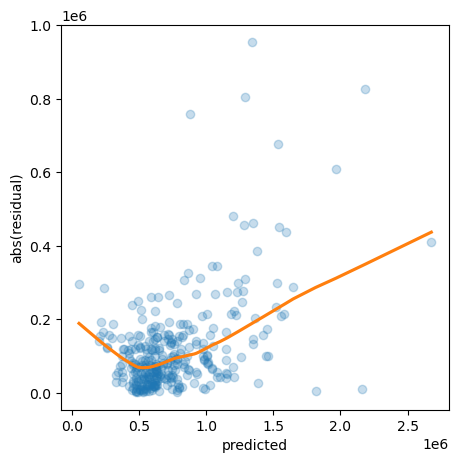

In [40]:
# heteroskedacity

fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(
    x=result_98105.fittedvalues, 
    y=np.abs(result_98105.resid),
    scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'},
    lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

# Heteroskedasticity indicates that prediction errors differ for differ‐
# ent ranges of the predicted value, and may suggest an incomplete
# model. For example, the heteroskedasticity in lm_98105 may indi‐
# cate that the regression has left something unaccounted for in high-and low-range homes.


## Polynomial Regression

- **Polynomial regression**<br>
Adds polynomial terms (squares, cubes, etc.) to a regression.<br>

- **Spline regression**<br>
Fitting a smooth curve with a series of polynomial segments.<br>

- **Knots**<br>
Values that separate spline segments.<br>

- **Generalized additive models**<br>
Spline models with automated selection of knots.<br>
Synonym: GAM

## Spline Regression

In [41]:
import statsmodels.formula.api as smf

formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' +\
    'SqFtLot + Bathrooms + Bedrooms + BldgGrade'
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()